<a href="https://colab.research.google.com/github/annesantos1990/spotify_project/blob/main/proj2_colaborativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Confirmado
⭐ Analisar
❌ Refutado

# **Importando a tabela do google drive**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_ind
from scipy.stats import pearsonr
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
joined_table_quartiles = pd.read_csv("https://docs.google.com/spreadsheets/d/1fkif74qIFmYVS-VjrNd5Vnl-h3iczHxDVOPds5iJn84/export?format=csv")

# **Informações sobre a tabela**

In [ ]:
joined_table_quartiles.head()

,track_id,track_name,artist_s__name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,liveness_classification,speechiness_classification,spotify_playlists_classification,spotify_charts_classification,apple_playlists_classification,apple_charts_classification,deezer_playlists_classification,deezer_charts_classification,shazam_charts_classification,total_playlists_classification
0,8292846,"HEY, MICKEY!",BABY TATE,1,27/09/2016,482,0,9,1,12,...,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Alto,Baixo,Baixo
1,3108040,STILL LIFE,BIGBANG,1,05/04/2022,181,0,16,14,7,...,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo
2,4618597,FOR YOUTH,BTS,1,10/06/2022,327,0,5,40,12,...,Alto,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo
3,8715137,MISERABLE MAN,DAVID KUSHNER,1,07/01/2022,788,0,13,0,32,...,Alto,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo
4,4671002,BOYFRIENDS,HARRY STYLES,1,20/05/2022,1517,0,26,2,30,...,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo


In [ ]:
joined_table_quartiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   track_id                          947 non-null    int64 
 1   track_name                        945 non-null    object
 2   artist_s__name                    947 non-null    object
 3   artist_count                      947 non-null    int64 
 4   release_date                      947 non-null    object
 5   in_spotify_playlists              947 non-null    int64 
 6   in_spotify_charts                 947 non-null    int64 
 7   in_apple_playlists                947 non-null    int64 
 8   in_apple_charts                   947 non-null    int64 
 9   in_deezer_playlists               947 non-null    int64 
 10  in_deezer_charts                  947 non-null    int64 
 11  in_shazam_charts_moda             947 non-null    int64 
 12  total_playlists       

# **Distribuição dos dados (streams)**

↪ Como os dados da coluna streams_int estão distribuídos?

In [ ]:
# Coluna a ser testada:
coluna_streams = joined_table_quartiles['streams_int']

# Teste de Shapiro-Wilk:
stat, p_value = stats.shapiro(coluna_streams)
print(f"Estatística do teste: {stat:.2f}")
print(f"Valor p: {p_value:.5f}")

if p_value > 0.05:
    print("Interpretação: Os dados seguem uma distribuição normal (não rejeita H0).")
else:
    print("Interpretação: Os dados não seguem uma distribuição normal (rejeita H0).")

Estatística do teste: 0.76
Valor p: 0.00000
Interpretação: Os dados não seguem uma distribuição normal (rejeita H0).


Text(0.5, 0, 'streams')

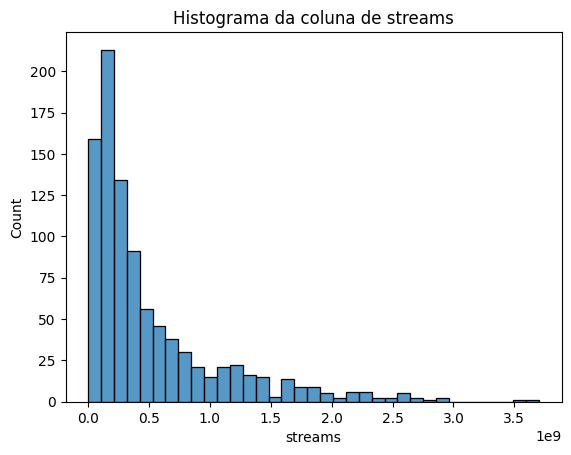

In [ ]:
# Histograma da distribuição dos streams:
sns.histplot(data=joined_table_quartiles,x='streams_int')
plt.title("Histograma da coluna de streams")
plt.xlabel("streams")

# **Teste de hipóteses (bpm)**

↪ Músicas com BPM (Batidas Por Minuto) mais altos fazem mais sucesso em termos de número de streams no Spotify? ❌

In [ ]:
# Streams onde o bpm é alto:
streams_bpm_alto = joined_table_quartiles[["streams_int","bpm_classification"]].query("bpm_classification == 'Alto'")["streams_int"]
streams_bpm_alto

11       42485571
13       91473363
18       65362788
19       98709329
21      121871870
          ...    
924    2665343922
933    2565529693
935    1115880852
940     775542072
942    1953533826
Name: streams_int, Length: 236, dtype: int64

In [ ]:
# Streams onde o bpm é baixo:
streams_bpm_baixo = joined_table_quartiles[["streams_int","bpm_classification"]].query("bpm_classification == 'Baixo'")["streams_int"]
streams_bpm_baixo

0       122763672
1        53909146
2       114546317
3       124407432
4       137070925
          ...    
941    1605224506
943    1047101291
944     843957510
945     863756573
946    1223481149
Name: streams_int, Length: 711, dtype: int64

In [ ]:
# Separando por grupos de 200:
streams_bpm_alto_sample = streams_bpm_alto.sample(200)
streams_bpm_baixo_sample = streams_bpm_baixo.sample(200)

In [ ]:
# Teste de Mann-Whitney/U para bpm:
stat, p_value = mannwhitneyu(streams_bpm_alto_sample, streams_bpm_baixo_sample)

# Resultado:
print(f'Estatística U: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Interpretação: As amostras são significativamente diferentes (p < 0.05).')
else:
    print('Interpretação: As amostras não são significativamente diferentes (p >= 0.05).')

Estatística U: 21037.0
Valor p: 0.36997756643260016
Interpretação: As amostras não são significativamente diferentes (p >= 0.05).


In [ ]:
# Mediana dos 2 grupos:
streams_bpm_baixo_sample.median(),streams_bpm_alto_sample.median()

(266669222.5, 281126134.0)

➡️ De acordo com o teste de Mann-Whitney U, não há diferença significativa entre as duas amostras que foram comparadas. Isso significa que, não há diferença significativa entre streams com BPM alto e streams com BPM baixo. Por isso, a hipótese de que as músicas com BPM mais alto fazem mais sucesso em termos de número de streams no Spotify foi rejeitada.

# **Teste de hipóteses (mode)**

↪ A escala musical influencia no número de streams? ❌

In [ ]:
# Streams onde mode é Maior:
streams_mode_maior = joined_table_quartiles[["streams_int","mode"]].query("mode == 'Major'")["streams_int"]
streams_mode_maior

0       122763672
1        53909146
2       114546317
3       124407432
4       137070925
          ...    
939    2713922350
941    1605224506
942    1953533826
943    1047101291
945     863756573
Name: streams_int, Length: 545, dtype: int64

In [ ]:
# Streams onde mode é Menor:
streams_mode_menor = joined_table_quartiles[["streams_int","mode"]].query("mode == 'Minor'")["streams_int"]
streams_mode_menor

5        68216992
6        61739839
7        37091576
11       42485571
12      127027715
          ...    
934    1109433169
938     933815613
940     775542072
944     843957510
946    1223481149
Name: streams_int, Length: 402, dtype: int64

In [ ]:
# Separando por grupos de 400:
streams_mode_maior_sample = streams_mode_maior.sample(400)
streams_mode_menor_sample = streams_mode_menor.sample(400)

In [ ]:
# Teste de Mann-Whitney/U para o total de playlists do Deezer:
stat, p_value = mannwhitneyu(streams_mode_maior_sample, streams_mode_menor_sample)

# Resultado:
print(f'Estatística U: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Interpretação: As amostras são significativamente diferentes (p < 0.05).')
else:
    print('Interpretação: As amostras não são significativamente diferentes (p >= 0.05).')

Estatística U: 84730.5
Valor p: 0.1477971013744222
Interpretação: As amostras não são significativamente diferentes (p >= 0.05).


➡️ Não há uma diferença significativa entre streams de músicas en escala maior e streams de músicas em escala menor.

# **Correlação (ranking nas diferentes plataformas)**

↪ As músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas? ⭐

**Regressão Linear (Ranking - Spotify)**

In [ ]:
#Separando as variáveis X e Y

x_spotify_charts = joined_table_quartiles["in_spotify_charts"].values
y_spotify_charts = joined_table_quartiles["streams_int"].values

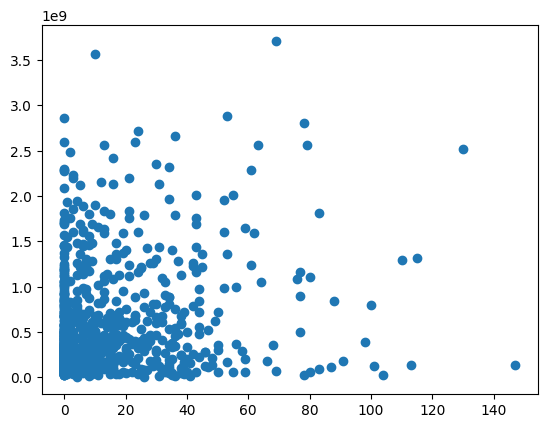

Coeficiente de correlação: PearsonRResult(statistic=0.24647542481845366, pvalue=1.4275864258816633e-14)


In [ ]:
plt.scatter(x_spotify_charts, y_spotify_charts)
plt.show()

r = pearsonr(x_spotify_charts, y_spotify_charts)
print(f'Coeficiente de correlação: {r}')

In [ ]:
# Separando dados de treino e de teste
# utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train_spotify_charts, x_test_spotify_charts, y_train_spotify_charts, y_test_spotify_charts = train_test_split(x_spotify_charts, y_spotify_charts, test_size=0.3)

# Precisamos redimensionar os dados para fazer a regressão linear
x_train_spotify_charts=x_train_spotify_charts.reshape(-1,1)
y_train_spotify_charts=y_train_spotify_charts.reshape(-1,1)
x_test_spotify_charts=x_test_spotify_charts.reshape(-1,1)
y_test_spotify_charts=y_test_spotify_charts.reshape(-1,1)

In [ ]:
#treinando o modelo
reg = LinearRegression()
reg.fit(x_train_spotify_charts,y_train_spotify_charts)
pred = reg.predict(x_test_spotify_charts)

Text(0, 0.5, 'Título do eixo y')

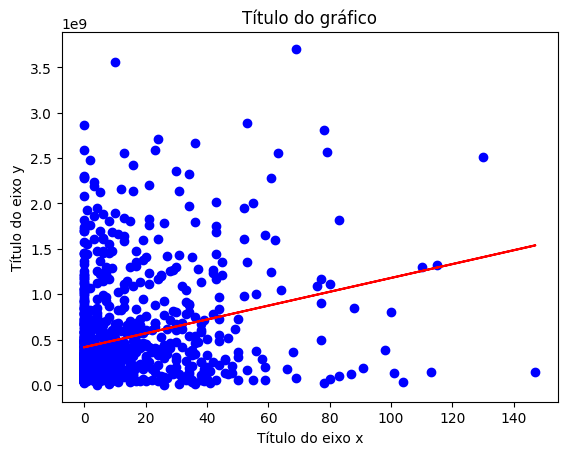

In [ ]:
plt.scatter(x_spotify_charts, y_spotify_charts, color="blue")
plt.plot(x_test_spotify_charts, pred, color="red")
plt.title("Título do gráfico")
plt.xlabel("Título do eixo x")
plt.ylabel("Título do eixo y")

## **Spotify vs Apple**

In [ ]:
# Correlação de Spearman (spotify vs apple):

correlation_charts_apple = joined_table_quartiles['in_spotify_charts'].corr(joined_table_quartiles['in_apple_charts'], method='spearman')
print('Correlação entre ranking do Spotify e o ranking da Apple:', correlation_charts_apple)


Correlação entre ranking do Spotify e o ranking da Apple: 0.5200762538424258


**Regressão Linear (Ranking - Apple)**

In [ ]:
#Separando as variáveis X e Y

x_apple_charts = joined_table_quartiles["in_apple_charts"].values
y_apple_charts = joined_table_quartiles["streams_int"].values

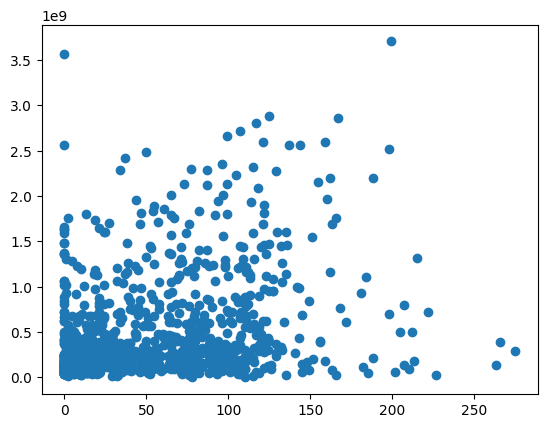

Coeficiente de correlação: PearsonRResult(statistic=0.3218605781180586, pvalue=2.8907023457896064e-24)


In [ ]:
plt.scatter(x_apple_charts, y_apple_charts)
plt.show()

r = pearsonr(x_apple_charts, y_apple_charts)
print(f'Coeficiente de correlação: {r}')

In [ ]:
#Separando dados de treino e de teste
#utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train_apple_charts, x_test_apple_charts, y_train_apple_charts, y_test_apple_charts = train_test_split(x_apple_charts, y_apple_charts, test_size=0.3)

#Precisamos redimensionar os dados para fazer a regressão linear
x_train_apple_charts=x_train_apple_charts.reshape(-1,1)
y_train_apple_charts=y_train_apple_charts.reshape(-1,1)
x_test_apple_charts=x_test_apple_charts.reshape(-1,1)
y_test_apple_charts=y_test_apple_charts.reshape(-1,1)

In [ ]:
#treinando o modelo
reg = LinearRegression()
reg.fit(x_train_apple_charts,y_train_apple_charts)
pred = reg.predict(x_test_apple_charts)

Text(0, 0.5, 'Título do eixo y')

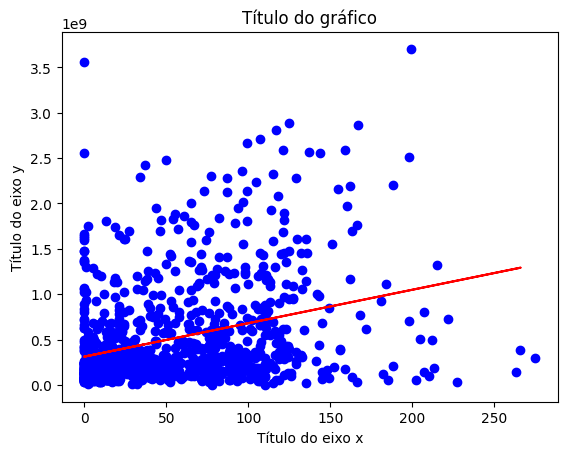

In [ ]:
plt.scatter(x_apple_charts, y_apple_charts, color="blue")
plt.plot(x_test_apple_charts, pred, color="red")
plt.title("Título do gráfico")
plt.xlabel("Título do eixo x")
plt.ylabel("Título do eixo y")

## **Spotify vs Deezer**

In [ ]:
# Correlação de Spearman (spotify vs deezer):

correlation_charts_deezer = joined_table_quartiles['in_spotify_charts'].corr(joined_table_quartiles['in_deezer_charts'], method='spearman')
print('Correlação entre ranking do Spotify e o ranking do Deezer:', correlation_charts_deezer)

Correlação entre ranking do Spotify e o ranking do Deezer: 0.5870005940354541


**Regressão Linear (Ranking - Deezer)**

In [ ]:
#Separando as variáveis X e Y

x_deezer_charts = joined_table_quartiles["in_deezer_charts"].values
y_deezer_charts = joined_table_quartiles["streams_int"].values

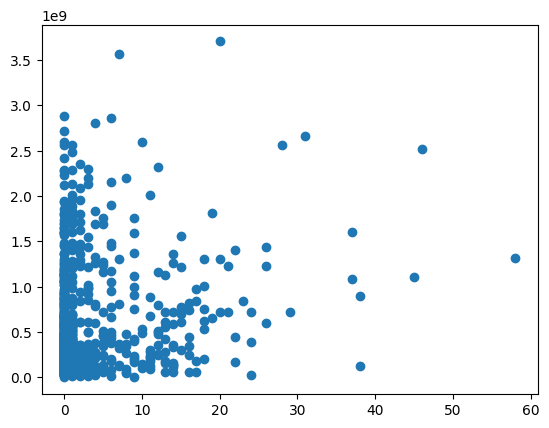

Coeficiente de correlação: PearsonRResult(statistic=0.23052073221810163, pvalue=6.896803991484621e-13)


In [ ]:
plt.scatter(x_deezer_charts, y_deezer_charts)
plt.show()

r = pearsonr(x_deezer_charts, y_deezer_charts)
print(f'Coeficiente de correlação: {r}')

In [ ]:
#Separando dados de treino e de teste
#utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train_deezer_charts, x_test_deezer_charts, y_train_deezer_charts, y_test_deezer_charts = train_test_split(x_deezer_charts, y_deezer_charts, test_size=0.3)

#Precisamos redimensionar os dados para fazer a regressão linear
x_train_deezer_charts=x_train_deezer_charts.reshape(-1,1)
y_train_deezer_charts=y_train_deezer_charts.reshape(-1,1)
x_test_deezer_charts=x_test_deezer_charts.reshape(-1,1)
y_test_deezer_charts=y_test_deezer_charts.reshape(-1,1)

In [ ]:
#treinando o modelo
reg = LinearRegression()
reg.fit(x_train_deezer_charts,y_train_deezer_charts)
pred = reg.predict(x_test_deezer_charts)

Text(0, 0.5, 'Título do eixo y')

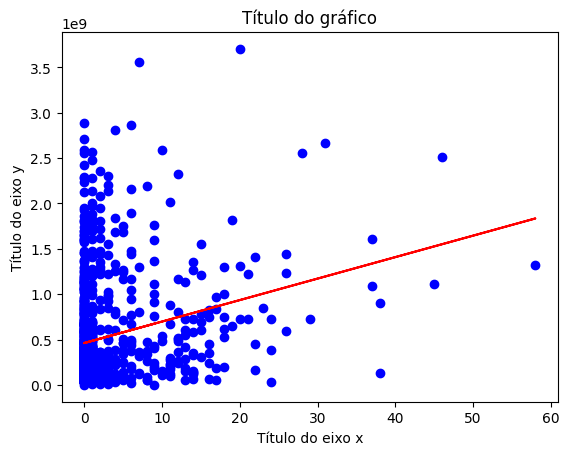

In [ ]:
plt.scatter(x_deezer_charts, y_deezer_charts, color="blue")
plt.plot(x_test_deezer_charts, pred, color="red")
plt.title("Título do gráfico")
plt.xlabel("Título do eixo x")
plt.ylabel("Título do eixo y")

## **Spotify vs Shazam**

In [ ]:
# Correlação de Spearman (spotify vs shazam):

correlation_charts_shazam = joined_table_quartiles['in_spotify_charts'].corr(joined_table_quartiles['in_shazam_charts_moda'], method='spearman')
print('Correlação entre ranking do Spotify e o ranking do Shazam:', correlation_charts_shazam)

Correlação entre ranking do Spotify e o ranking do Shazam: 0.5393898498423904


**Regressão Linear (Ranking - Shazam)**

In [ ]:
#Separando as variáveis X e Y

x_shazam_charts = joined_table_quartiles["in_shazam_charts_moda"].values
y_shazam_charts = joined_table_quartiles["streams_int"].values

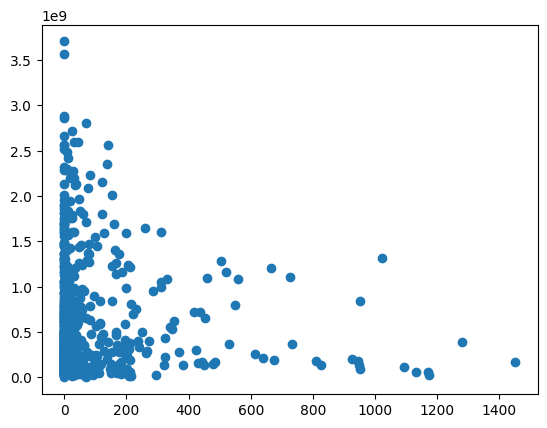

Coeficiente de correlação: PearsonRResult(statistic=-0.007120425860414168, pvalue=0.8267802684833082)


In [ ]:
plt.scatter(x_shazam_charts, y_shazam_charts)
plt.show()

r = pearsonr(x_shazam_charts, y_shazam_charts)
print(f'Coeficiente de correlação: {r}')

In [ ]:
#Separando dados de treino e de teste
#utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train_shazam_charts, x_test_shazam_charts, y_train_shazam_charts, y_test_shazam_charts = train_test_split(x_shazam_charts, y_shazam_charts, test_size=0.3)

#Precisamos redimensionar os dados para fazer a regressão linear
x_train_shazam_charts=x_train_shazam_charts.reshape(-1,1)
y_train_shazam_charts=y_train_shazam_charts.reshape(-1,1)
x_test_shazam_charts=x_test_shazam_charts.reshape(-1,1)
y_test_shazam_charts=y_test_shazam_charts.reshape(-1,1)

In [ ]:
#treinando o modelo
reg = LinearRegression()
reg.fit(x_train_shazam_charts,y_train_shazam_charts)
pred = reg.predict(x_test_shazam_charts)

Text(0, 0.5, 'Título do eixo y')

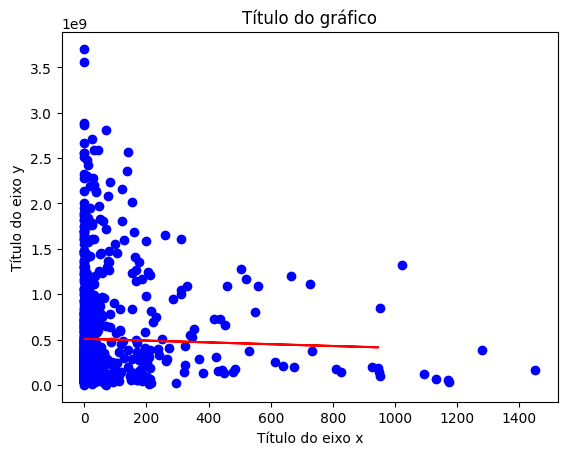

In [ ]:
plt.scatter(x_shazam_charts, y_shazam_charts, color="blue")
plt.plot(x_test_shazam_charts, pred, color="red")
plt.title("Título do gráfico")
plt.xlabel("Título do eixo x")
plt.ylabel("Título do eixo y")

# **Teste de hipóteses (total de playlists)**

↪ A presença de uma música em um maior número de playlists está correlacionada com um maior número de streams? ✅

In [ ]:
# Streams onde o total de playlists é alto:
streams_playlists_alto = joined_table_quartiles[["streams_int","total_playlists_classification"]].query("total_playlists_classification == 'Alto'")["streams_int"]
streams_playlists_alto

66      245350949
120     663832097
122     395591396
123     446390129
127     629173063
          ...    
942    1953533826
943    1047101291
944     843957510
945     863756573
946    1223481149
Name: streams_int, Length: 236, dtype: int64

In [ ]:
# Streams onde o total de playlists é baixo:
streams_playlists_baixo = joined_table_quartiles[["streams_int","total_playlists_classification"]].query("total_playlists_classification == 'Baixo'")["streams_int"]
streams_playlists_baixo

0       122763672
1        53909146
2       114546317
3       124407432
4       137070925
          ...    
914     705469769
916     759208783
927     674072710
936    1223481149
940     775542072
Name: streams_int, Length: 711, dtype: int64

In [ ]:
# Separando por grupos de 200:
streams_playlists_alto_sample = streams_playlists_alto.sample(200)
streams_playlists_baixo_sample = streams_playlists_baixo.sample(200)

In [ ]:
# Teste de Mann-Whitney/U para o total de playlists:
stat, p_value = mannwhitneyu(streams_playlists_alto_sample, streams_playlists_baixo_sample)

# Resultado:
print(f'Estatística U: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Interpretação: As amostras são significativamente diferentes (p < 0.05).')
else:
    print('Interpretação: As amostras não são significativamente diferentes (p >= 0.05).')

Estatística U: 37737.0
Valor p: 4.062822821823349e-53
Interpretação: As amostras são significativamente diferentes (p < 0.05).


In [ ]:
streams_playlists_baixo_sample.median(),streams_playlists_alto_sample.median()

(211642887.0, 1174368885.5)

**Regressão Linear**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [ ]:
#Separando as variáveis X e Y

x_total_playlists = joined_table_quartiles["total_playlists"].values
y_total_playlists = joined_table_quartiles["streams_int"].values

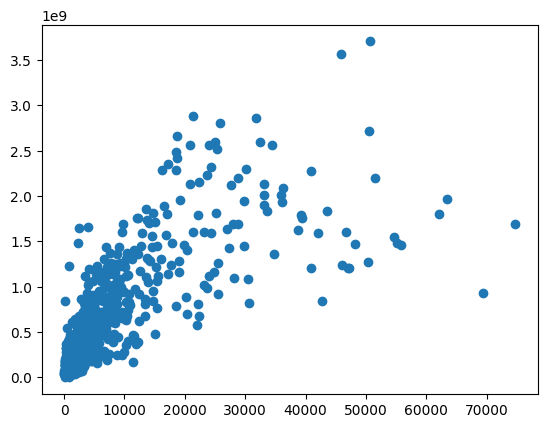

Coeficiente de correlação: PearsonRResult(statistic=0.7711989816876648, pvalue=1.5025827032953671e-187)


In [ ]:
plt.scatter(x_total_playlists, y_total_playlists)
plt.show()

r = pearsonr(x_total_playlists, y_total_playlists)
print(f'Coeficiente de correlação: {r}')

In [ ]:
#Separando dados de treino e de teste
#utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train_totalPlaylists, x_test_totalPlaylists, y_train_totalPlaylists, y_test_totalPlaylists = train_test_split(x_total_playlists, y_total_playlists, test_size=0.3)

#Precisamos redimensionar os dados para fazer a regressão linear
x_train_totalPlaylists=x_train_totalPlaylists.reshape(-1,1)
y_train_totalPlaylists=y_train_totalPlaylists.reshape(-1,1)
x_test_totalPlaylists=x_test_totalPlaylists.reshape(-1,1)
y_test_totalPlaylists=y_test_totalPlaylists.reshape(-1,1)

In [ ]:
#treinando o modelo
reg = LinearRegression()
reg.fit(x_train_totalPlaylists,y_train_totalPlaylists)
pred = reg.predict(x_test_totalPlaylists)

Text(0, 0.5, 'Título do eixo y')

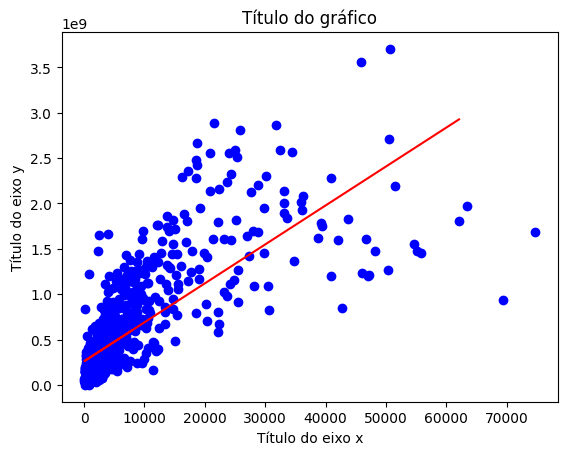

In [ ]:
plt.scatter(x_total_playlists, y_total_playlists, color="blue")
plt.plot(x_test_totalPlaylists, pred, color="red")
plt.title("Título do gráfico")
plt.xlabel("Título do eixo x")
plt.ylabel("Título do eixo y")

➡️ Resumo:

*   De acordo com o teste de Mann-Whitney U, existe uma diferença significativa entre os streams das músicas que estão em um alto número de playlists e os streams das músicas que estão em um baixo número de playlists.
*   A correlação entre streams e o total de playlists foi 0.77, que indica uma correlação positiva que pode ser considerada forte, isso significa que, à medida que uma variável aumenta, a outra variável também tende a aumentar; e quando uma variável diminui, a outra também tende a diminuir.

## **Teste de hipóteses (Spotify)**

In [ ]:
# Streams onde o total de playlists do Spotify é alto:
streams_spotify_playlists_alto = joined_table_quartiles[["streams_int","spotify_playlists_classification"]].query("spotify_playlists_classification == 'Alto'")["streams_int"]
streams_spotify_playlists_alto

66      245350949
120     663832097
122     395591396
123     446390129
127     629173063
          ...    
942    1953533826
943    1047101291
944     843957510
945     863756573
946    1223481149
Name: streams_int, Length: 236, dtype: int64

In [ ]:
# Streams onde o total de playlists do Spotify é baixo:
streams_spotify_playlists_baixo = joined_table_quartiles[["streams_int","spotify_playlists_classification"]].query("spotify_playlists_classification == 'Baixo'")["streams_int"]
streams_spotify_playlists_baixo

0       122763672
1        53909146
2       114546317
3       124407432
4       137070925
          ...    
914     705469769
916     759208783
927     674072710
936    1223481149
940     775542072
Name: streams_int, Length: 711, dtype: int64

In [ ]:
# Separando por grupos de 200:
streams_spotify_playlists_alto_sample = streams_spotify_playlists_alto.sample(200)
streams_spotify_playlists_baixo_sample = streams_spotify_playlists_baixo.sample(200)

In [ ]:
# Teste de Mann-Whitney/U para o total de playlists do spotify:
stat, p_value = mannwhitneyu(streams_spotify_playlists_alto_sample, streams_spotify_playlists_baixo_sample)

# Resultado:
print(f'Estatística U: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Interpretação: As amostras são significativamente diferentes (p < 0.05).')
else:
    print('Interpretação: As amostras não são significativamente diferentes (p >= 0.05).')

Estatística U: 38317.5
Valor p: 1.5664944198594787e-56
Interpretação: As amostras são significativamente diferentes (p < 0.05).


In [ ]:
streams_spotify_playlists_baixo_sample.median(), streams_spotify_playlists_alto_sample.median()

(192942017.5, 1174368885.5)

## **Teste de hipóteses (Apple)**

In [ ]:
# Streams onde o total de playlists da Apple é alto:
streams_apple_playlists_alto = joined_table_quartiles[["streams_int","apple_playlists_classification"]].query("apple_playlists_classification == 'Alto'")["streams_int"]
streams_apple_playlists_alto

66      245350949
120     663832097
122     395591396
127     629173063
131     389771964
          ...    
941    1605224506
942    1953533826
944     843957510
945     863756573
946    1223481149
Name: streams_int, Length: 236, dtype: int64

In [ ]:
# Streams onde o total de playlists da Apple é baixo:
streams_apple_playlists_baixo = joined_table_quartiles[["streams_int","apple_playlists_classification"]].query("apple_playlists_classification == 'Baixo'")["streams_int"]
streams_apple_playlists_baixo

0       122763672
1        53909146
2       114546317
3       124407432
4       137070925
          ...    
926    1133865788
927     674072710
936    1223481149
940     775542072
943    1047101291
Name: streams_int, Length: 711, dtype: int64

In [ ]:
# Separando por grupos de 200:
streams_apple_playlists_alto_sample = streams_apple_playlists_alto.sample(200)
streams_apple_playlists_baixo_sample = streams_apple_playlists_baixo.sample(200)

In [ ]:
# Teste de Mann-Whitney/U para o total de playlists da Apple:
stat, p_value = mannwhitneyu(streams_apple_playlists_alto_sample, streams_apple_playlists_baixo_sample)

# Resultado:
print(f'Estatística U: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Interpretação: As amostras são significativamente diferentes (p < 0.05).')
else:
    print('Interpretação: As amostras não são significativamente diferentes (p >= 0.05).')

Estatística U: 35055.0
Valor p: 9.256545489751388e-39
Interpretação: As amostras são significativamente diferentes (p < 0.05).


In [ ]:
streams_apple_playlists_baixo_sample.median(),streams_apple_playlists_alto_sample.median()

(230746990.0, 978073570.0)

## **Teste de hipóteses (Deezer)**

In [ ]:
# Streams onde o total de playlists do Deezer é alto:
streams_deezer_playlists_alto = joined_table_quartiles[["streams_int","deezer_playlists_classification"]].query("deezer_playlists_classification == 'Alto'")["streams_int"]
streams_deezer_playlists_alto

123     446390129
127     629173063
129     563902868
130     476244795
131     389771964
          ...    
942    1953533826
943    1047101291
944     843957510
945     863756573
946    1223481149
Name: streams_int, Length: 236, dtype: int64

In [ ]:
# Streams onde o total de playlists do Deezer é baixo:
streams_deezer_playlists_baixo = joined_table_quartiles[["streams_int","deezer_playlists_classification"]].query("deezer_playlists_classification == 'Baixo'")["streams_int"]
streams_deezer_playlists_baixo

0       122763672
1        53909146
2       114546317
3       124407432
4       137070925
          ...    
927     674072710
929    1440757818
931    1356565093
936    1223481149
940     775542072
Name: streams_int, Length: 711, dtype: int64

In [ ]:
# Separando por grupos de 200:
streams_deezer_playlists_alto_sample = streams_deezer_playlists_alto.sample(200)
streams_deezer_playlists_baixo_sample = streams_deezer_playlists_baixo.sample(200)

In [ ]:
# Teste de Mann-Whitney/U para o total de playlists do Deezer:
stat, p_value = mannwhitneyu(streams_deezer_playlists_alto_sample, streams_deezer_playlists_baixo_sample)

# Resultado:
print(f'Estatística U: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Interpretação: As amostras são significativamente diferentes (p < 0.05).')
else:
    print('Interpretação: As amostras não são significativamente diferentes (p >= 0.05).')

Estatística U: 36273.0
Valor p: 5.424550807124199e-45
Interpretação: As amostras são significativamente diferentes (p < 0.05).


In [ ]:
streams_deezer_playlists_baixo_sample.median(),streams_deezer_playlists_alto_sample.median()

(189356493.5, 1064268480.0)

# **Correlação (total de músicas por artista)**

↪ Artistas com um maior número de músicas no Spotify têm mais streams? ⭐

In [ ]:
joined_table_quartiles['artist_s__name'].value_counts()

artist_s__name
TAYLOR SWIFT                                       34
THE WEEKND                                         21
BAD BUNNY                                          19
SZA                                                19
HARRY STYLES                                       17
                                                   ..
TRAVIS SCOTT, METRO BOOMIN                          1
THE WEEKND, LIL WAYNE                               1
THE WEEKND, FUTURE                                  1
TAYLOR SWIFT, ICE SPICE                             1
IMAGINE DRAGONS, LEAGUE OF LEGENDS, JID, ARCANE     1
Name: count, Length: 643, dtype: int64

In [ ]:
# Agrupar por 'artist_s__name' e contar as ocorrências de 'artist_s__name':
grouped_data = joined_table_quartiles.groupby('artist_s__name').agg({'artist_s__name': 'count','streams_int': 'sum'}).rename(columns={"artist_s__name" : "qnt"})

# Ordenar os resultados pelo número de músicas:
total_streams_by_artist = grouped_data.sort_values(by='qnt', ascending=False)

total_streams_by_artist.reset_index(inplace=True)


In [ ]:
total_streams_by_artist

,artist_s__name,qnt,streams_int
0,TAYLOR SWIFT,34,14053658300
1,THE WEEKND,21,13752850536
2,BAD BUNNY,19,9997799607
3,SZA,19,4557811204
4,HARRY STYLES,17,11608645649
...,...,...,...
638,"INTERPLANETARY CRIMINAL, ELIZA ROSE",1,244585109
639,INTERWORLD,1,357580552
640,"ISRAEL & RODOLFFO, ANA CASTELA",1,263453310
641,"ISRAEL & RODOLFFO, MARI FERNANDEZ",1,138517666


In [ ]:
# Correlação de Spearman (total de músicas por artista vs streams):

correlation_streams_by_artist = total_streams_by_artist['streams_int'].corr(total_streams_by_artist['qnt'], method='spearman')
print('Correlação de Spearman:', correlation_streams_by_artist)

Correlação de Spearman: 0.4480950151832505


### **Regressão Linear**

In [ ]:
#Separando as variáveis X e Y

x_streams_by_artist = total_streams_by_artist['qnt'].values
y_streams_by_artist = total_streams_by_artist['streams_int'].values

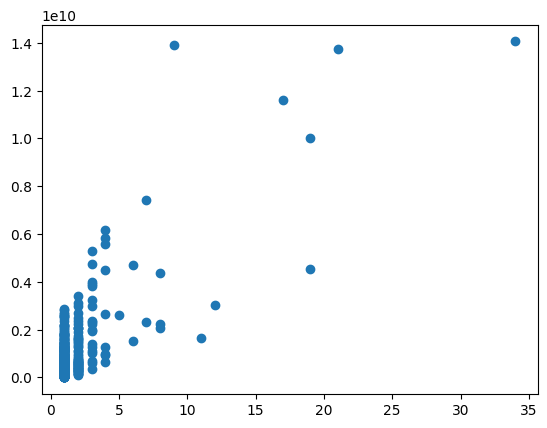

Coeficiente de correlação: PearsonRResult(statistic=0.7783683849468839, pvalue=1.0319194369044627e-131)


In [ ]:
plt.scatter(x_streams_by_artist, y_streams_by_artist)
plt.show()

r = pearsonr(x_streams_by_artist, y_streams_by_artist)
print(f'Coeficiente de correlação: {r}')

In [ ]:
#Separando dados de treino e de teste
#utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train_streamsByArtist, x_test_streamsByArtist, y_train_streamsByArtist, y_test_streamsByArtist = train_test_split(x_streams_by_artist, y_streams_by_artist, test_size=0.3)

#Precisamos redimensionar os dados para fazer a regressão linear
x_train_streamsByArtist=x_train_streamsByArtist.reshape(-1,1)
y_train_streamsByArtist=y_train_streamsByArtist.reshape(-1,1)
x_test_streamsByArtist=x_test_streamsByArtist.reshape(-1,1)
y_test_streamsByArtist=y_test_streamsByArtist.reshape(-1,1)

In [ ]:
#treinando o modelo
reg = LinearRegression()
reg.fit(x_train_streamsByArtist,y_train_streamsByArtist)
pred = reg.predict(x_test_streamsByArtist)

Text(0, 0.5, 'Streams')

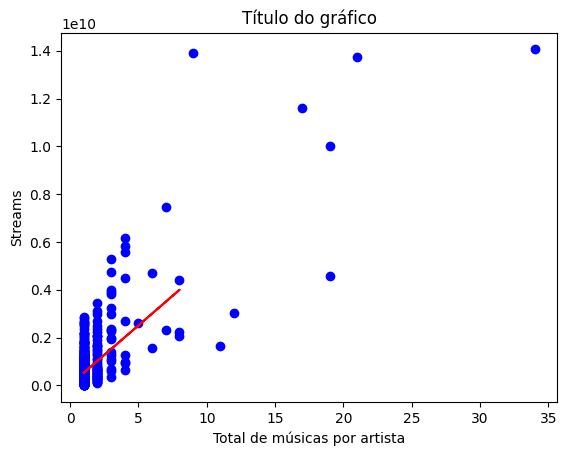

In [ ]:
plt.scatter(x_streams_by_artist, y_streams_by_artist, color="blue")
plt.plot(x_test_streamsByArtist, pred, color="red")
plt.title("Título do gráfico")
plt.xlabel("Total de músicas por artista")
plt.ylabel("Streams")

# **Teste de hipóteses (total de artistas por música)**

↪ O total de artistas envolvidos em uma música tem relação com o total de streams? ✅

In [ ]:
filtered_data = joined_table_quartiles.query("artist_count == 1")
music_solo = filtered_data[["track_name", "artist_count"]]
music_solo

,track_name,artist_count
0,"HEY, MICKEY!",1
1,STILL LIFE,1
2,FOR YOUTH,1
3,MISERABLE MAN,1
4,BOYFRIENDS,1
...,...,...
886,KILL BILL,1
887,CRUEL SUMMER,1
888,I WANNA BE YOURS,1
889,FLOWERS,1


In [ ]:
# Streams onde artist_count é 1:
streams_music_solo = joined_table_quartiles[["streams_int","artist_count"]].query("artist_count == 1")["streams_int"]
streams_music_solo

0       122763672
1        53909146
2       114546317
3       124407432
4       137070925
          ...    
886    1163093654
887     800840817
888    1297026226
889    1316855716
890    2513188493
Name: streams_int, Length: 582, dtype: int64

In [ ]:
# Streams onde artist_count é maior que 1:
streams_music_feat = joined_table_quartiles[["streams_int","artist_count"]].query("artist_count > 1")["streams_int"]
streams_music_feat

39      139836056
40       78139948
41       33381454
42      123216717
43       71095708
          ...    
942    1953533826
943    1047101291
944     843957510
945     863756573
946    1223481149
Name: streams_int, Length: 365, dtype: int64

In [ ]:
# Separando por grupos de 300:
streams_music_solo_sample = streams_music_solo.sample(300)
streams_music_feat_sample = streams_music_feat.sample(300)

In [ ]:
# Teste de Mann-Whitney/U:
stat, p_value = mannwhitneyu(streams_music_solo_sample, streams_music_feat_sample)

# Resultado:
print(f'Estatística U: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Interpretação: As amostras são significativamente diferentes (p < 0.05).')
else:
    print('Interpretação: As amostras não são significativamente diferentes (p >= 0.05).')

Estatística U: 53897.5
Valor p: 2.782234378533185e-05
Interpretação: As amostras são significativamente diferentes (p < 0.05).


<Axes: xlabel='streams_int', ylabel='artist_count'>

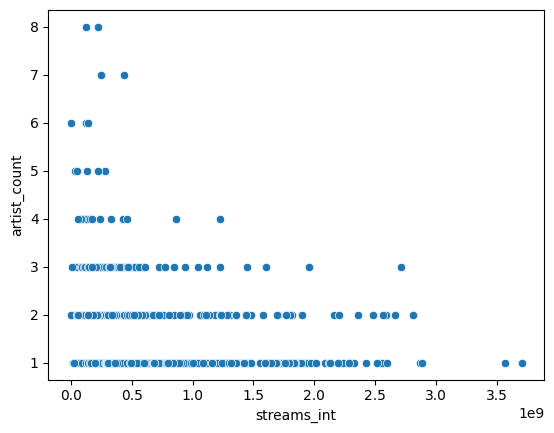

In [ ]:
sns.scatterplot(data=joined_table_quartiles, x='streams_int', y='artist_count')

### **Regressão Linear**

In [ ]:
#Separando as variáveis X e Y

x_musics_by_artist = joined_table_quartiles['artist_count'].values
y_musics_by_artist = joined_table_quartiles['streams_int'].values

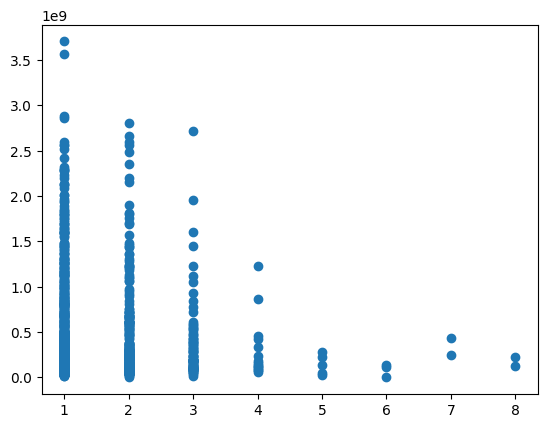

Coeficiente de correlação: PearsonRResult(statistic=-0.13632653956816745, pvalue=2.5610421644090818e-05)


In [ ]:
plt.scatter(x_musics_by_artist, y_musics_by_artist)
plt.show()

r = pearsonr(x_musics_by_artist, y_musics_by_artist)
print(f'Coeficiente de correlação: {r}')

In [ ]:
#Separando dados de treino e de teste
#utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train_musicsByArtist, x_test_musicsByArtist, y_train_musicsByArtist, y_test_musicsByArtist = train_test_split(x_musics_by_artist, y_musics_by_artist, test_size=0.3)

#Precisamos redimensionar os dados para fazer a regressão linear
x_train_musicsByArtist=x_train_musicsByArtist.reshape(-1,1)
y_train_musicsByArtist=y_train_musicsByArtist.reshape(-1,1)
x_test_musicsByArtist=x_test_musicsByArtist.reshape(-1,1)
y_test_musicsByArtist=y_test_musicsByArtist.reshape(-1,1)

In [ ]:
#treinando o modelo
reg = LinearRegression()
reg.fit(x_train_musicsByArtist,y_train_musicsByArtist)
pred = reg.predict(x_test_musicsByArtist)

Text(0, 0.5, 'Streams')

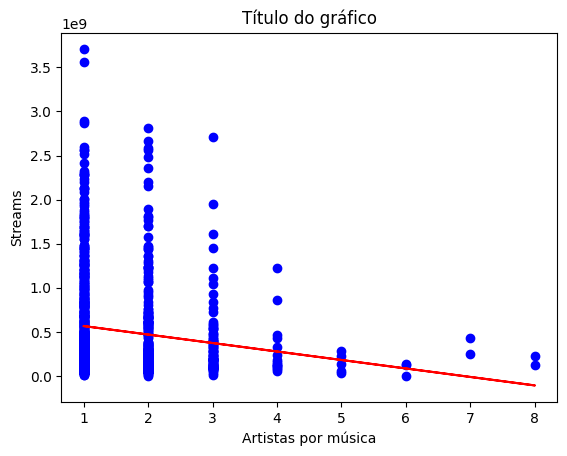

In [ ]:
plt.scatter(x_musics_by_artist, y_musics_by_artist, color="blue")
plt.plot(x_test_musicsByArtist, pred, color="red")
plt.title("Título do gráfico")
plt.xlabel("Artistas por música")
plt.ylabel("Streams")

➡️ Resumo:

*   O teste de Mann-Whitney-U indica que existe uma diferença significativa entre os streams de músicas solo e os streams de músicas com mais de um artista.
*   Com correlação negativa fraca de -0.13.



# **Análise das características das músicas**

## **Separação dos grupos**

In [ ]:
# Separar os dados em grupos de baixo e alto para cada característica

#danceability
baixo_streams_danceability = joined_table_quartiles[joined_table_quartiles['danceability_classification'] == 'Baixo']['streams_int']
alto_streams_danceability = joined_table_quartiles[joined_table_quartiles['danceability_classification'] == 'Alto']['streams_int']
print('Baixo:', baixo_streams_danceability)
print('Alto:', alto_streams_danceability)

#valence
baixo_streams_valence = joined_table_quartiles[joined_table_quartiles['valence_classification'] == 'Baixo']['streams_int']
alto_streams_valence = joined_table_quartiles[joined_table_quartiles['valence_classification'] == 'Alto']['streams_int']
print('Baixo:', baixo_streams_valence)
print('Alto:', alto_streams_valence)

#energy
baixo_streams_energy = joined_table_quartiles[joined_table_quartiles['energy_classification'] == 'Baixo']['streams_int']
alto_streams_energy = joined_table_quartiles[joined_table_quartiles['energy_classification'] == 'Alto']['streams_int']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#acousticness
baixo_streams_acousticness = joined_table_quartiles[joined_table_quartiles['acousticness_classification'] == 'Baixo']['streams_int']
alto_streams_acousticness = joined_table_quartiles[joined_table_quartiles['acousticness_classification'] == 'Alto']['streams_int']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#instrumentalness
baixo_streams_instrumentalness= joined_table_quartiles[joined_table_quartiles['instrumentalness_classification'] == 'Baixo']['streams_int']
alto_streams_instrumentalness = joined_table_quartiles[joined_table_quartiles['instrumentalness_classification'] == 'Alto']['streams_int']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#liveness
baixo_streams_liveness = joined_table_quartiles[joined_table_quartiles['liveness_classification'] == 'Baixo']['streams_int']
alto_streams_liveness = joined_table_quartiles[joined_table_quartiles['liveness_classification'] == 'Alto']['streams_int']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#speechiness
baixo_streams_speechiness = joined_table_quartiles[joined_table_quartiles['speechiness_classification'] == 'Baixo']['streams_int']
alto_streams_speechiness = joined_table_quartiles[joined_table_quartiles['speechiness_classification'] == 'Alto']['streams_int']
print('Baixo:', baixo_streams_energy)
print('Alto:', alto_streams_energy)

#verificando se tem valores nulos nos grupos:
print('valores nulos:', baixo_streams_danceability.isnull().sum())
print('valores nulos:', alto_streams_danceability.isnull().sum())

Baixo: 1        53909146
2       114546317
3       124407432
4       137070925
5        68216992
          ...    
940     775542072
942    1953533826
943    1047101291
944     843957510
946    1223481149
Name: streams_int, Length: 711, dtype: int64
Alto: 0       122763672
29      134294498
32       95053634
35       29562220
36       16011326
          ...    
929    1440757818
932     899183384
938     933815613
941    1605224506
945     863756573
Name: streams_int, Length: 236, dtype: int64
Baixo: 1        53909146
2       114546317
3       124407432
4       137070925
5        68216992
          ...    
939    2713922350
940     775542072
943    1047101291
944     843957510
946    1223481149
Name: streams_int, Length: 711, dtype: int64
Alto: 0       122763672
7        37091576
10       41210087
12      127027715
29      134294498
          ...    
935    1115880852
938     933815613
941    1605224506
942    1953533826
945     863756573
Name: streams_int, Length: 236, dtype: int64
Ba

## **Transformando em Array**

In [ ]:
# Convertendo os grupos para arrays NumPy

#danceability
baixo_array_danceability = np.array(baixo_streams_danceability)
alto_array_danceability = np.array(alto_streams_danceability)

#valence
baixo_array_valence = np.array(baixo_streams_valence)
alto_array_valence = np.array(alto_streams_valence)

#energy
baixo_array_energy = np.array(baixo_streams_energy)
alto_array_energy = np.array(alto_streams_energy)

#acousticness
baixo_array_acousticness = np.array(baixo_streams_acousticness)
alto_array_acousticness = np.array(alto_streams_energy)

#instrumentalness
baixo_array_instrumentalness = np.array(baixo_streams_instrumentalness)
alto_array_instrumentalness = np.array(alto_streams_instrumentalness)

#liveness
baixo_array_liveness = np.array(baixo_streams_liveness)
alto_array_liveness = np.array(alto_streams_liveness)

#speechiness
baixo_array_speechiness = np.array(baixo_streams_speechiness)
alto_array_speechiness = np.array(alto_streams_speechiness)

#verificando o tipo de dado:
print(baixo_array_danceability.dtype)
print(alto_array_danceability.dtype)


int64
int64


In [ ]:
#verificando se há pelo menos um valor NaN
print(np.isnan(baixo_array_danceability).any())
print(np.isnan(alto_array_danceability).any())

False
False


## **Teste de Normalidade**

In [ ]:
# Verificando a normalidade do grupo baixo e alto

#danceability (1)
stat_baixo, p_valor_baixo = shapiro(baixo_array_danceability)
print("Grupo Baixo - Estatística do teste:", stat_baixo, "Valor p:", p_valor_baixo)
stat_alto, p_valor_alto= shapiro(alto_array_danceability)
print("Grupo Alto - Estatística do teste:", stat_alto, "Valor p:", p_valor_alto)



Grupo Baixo - Estatística do teste: 0.7773969173431396 Valor p: 5.604112329579128e-30
Grupo Alto - Estatística do teste: 0.7058113813400269 Valor p: 4.1542722884774976e-20


## **Teste estatístico**

In [ ]:
# Lista de testes e seus arrays correspondentes
testes = ['Danceability', 'Valence', 'Energy', 'Acousticness','Instrumentalness', 'Liveness', 'Speechiness']
arrays = [(baixo_array_danceability, alto_array_danceability), (baixo_array_valence, alto_array_valence),(baixo_array_energy, alto_array_energy), (baixo_array_acousticness, alto_array_acousticness), (baixo_array_instrumentalness, alto_array_instrumentalness), (baixo_array_liveness, alto_array_liveness), (baixo_array_speechiness, alto_array_speechiness)]

# Lista para armazenar os resultados
resultados = []

# Loop sobre os testes
for teste, (baixo_array, alto_array) in zip(testes, arrays):
    # Teste de Mann-Whitney U
    if mannwhitneyu(baixo_array, alto_array).pvalue < 0.05:
        estatistica_teste = mannwhitneyu(baixo_array, alto_array).statistic
        p_valor = mannwhitneyu(baixo_array, alto_array).pvalue
        if p_valor > 0.05:
            diferenca_significativa = 'Não'
        else:
            diferenca_significativa = 'Sim'
    # Teste t de Student
    else:
        estatistica_teste = ttest_ind(baixo_array, alto_array).statistic
        p_valor = ttest_ind(baixo_array, alto_array).pvalue
        if p_valor > 0.05:
            diferenca_significativa = 'Não'
        else:
            diferenca_significativa = 'Sim'
    resultados.append([teste, estatistica_teste, p_valor, diferenca_significativa])

# Criando o DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Teste', 'Estatística do Teste', 'Valor-p', 'Diferença Significativa'])

# Exibindo a tabela
print(df_resultados)
#print(tabulate(df_resultados, headers='keys', tablefmt='grid', showindex=False))


              Teste  Estatística do Teste   Valor-p Diferença Significativa
0      Danceability          91844.000000  0.029086                     Sim
1           Valence              1.439768  0.150264                     Não
2            Energy              0.460827  0.645029                     Não
3      Acousticness              0.161011  0.872119                     Não
4  Instrumentalness             -0.870311  0.384351                     Não
5          Liveness              0.871173  0.383881                     Não
6       Speechiness          92805.000000  0.014435                     Sim


## **Gráficos**

In [ ]:
# Criar a figura com a grade de subplots
fig = make_subplots(rows=1, cols=7, subplot_titles=('Danceability', 'Valence', 'Energy', 'acousticness', 'instrumentalness','liveness','speechiness' ))

# danceability
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["danceability_classification"] == "Baixo"]["streams_int"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=1)
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["danceability_classification"] == "Alto"]["streams_int"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=1)

#valence
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["valence_classification"] == "Baixo"]["streams_int"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=2)
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["valence_classification"] == "Alto"]["streams_int"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=2)

#energy
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["energy_classification"] == "Baixo"]["streams_int"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=3)
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["energy_classification"] == "Alto"]["streams_int"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=3)
#acousticness
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["acousticness_classification"] == "Baixo"]["streams_int"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=4)
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["acousticness_classification"] == "Alto"]["streams_int"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=4)

#instrumentalness
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["instrumentalness_classification"] == "Baixo"]["streams_int"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=5)
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["instrumentalness_classification"] == "Alto"]["streams_int"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=5)

#liveness
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["liveness_classification"] == "Baixo"]["streams_int"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=6)
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["liveness_classification"] == "Alto"]["streams_int"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=6)

#speechiness
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["speechiness_classification"] == "Baixo"]["streams_int"],
                     name='Baixo', marker_color='cornflowerblue'), row=1, col=7)
fig.add_trace(go.Box(y=joined_table_quartiles[joined_table_quartiles["speechiness_classification"] == "Alto"]["streams_int"],
                     name='Alto', marker_color='lightseagreen'), row=1, col=7)

# Mostrar a figura
fig.show()


In [ ]:
# Calcular a média dos streams para cada classificação de cada característica
mean_streams_danceability = joined_table_quartiles.groupby(['danceability_classification'])['streams_int'].mean()
mean_streams_valence = joined_table_quartiles.groupby(['speechiness_classification'])['streams_int'].mean()
print(mean_streams_danceability)
print(mean_streams_valence)

danceability_classification
Alto     4.236500e+08
Baixo    5.442785e+08
Name: streams_int, dtype: float64
speechiness_classification
Alto     4.141518e+08
Baixo    5.474312e+08
Name: streams_int, dtype: float64
